Data Processing

In [2]:
import GEOparse

dest_folder = "./GSE36059_data"

gse = GEOparse.get_GEO("GSE36059")

17-Mar-2025 22:45:12 DEBUG utils - Directory ./ already exists. Skipping.
17-Mar-2025 22:45:12 INFO GEOparse - File already exist: using local version.
17-Mar-2025 22:45:12 INFO GEOparse - Parsing ./GSE36059_family.soft.gz: 
17-Mar-2025 22:45:12 DEBUG GEOparse - DATABASE: GeoMiame
17-Mar-2025 22:45:12 DEBUG GEOparse - SERIES: GSE36059
17-Mar-2025 22:45:12 DEBUG GEOparse - PLATFORM: GPL570
C:\Users\ajxxs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\GEOparse\GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
17-Mar-2025 22:45:12 DEBUG GEOparse - SAMPLE: GSM880204
17-Mar-2025 22:45:13 DEBUG GEOparse - SAMPLE: GSM880205
17-Mar-2025 22:45:13 DEBUG GEOparse - SAMPLE: GSM880206
17-Mar-2025 22:45:13 DEBUG GEOparse - SAMPLE: GSM880207
17-Mar-2025 22:45:13 DEBUG GEOparse - SAMPLE: GSM880208
17-

In [2]:
print("Sample size：", len(gse.gsms))  # gsms stores all samples (GSM)
print(gse.gsms.keys())            # You can see the ID of each GSM

Sample size： 411
dict_keys(['GSM880204', 'GSM880205', 'GSM880206', 'GSM880207', 'GSM880208', 'GSM880209', 'GSM880210', 'GSM880211', 'GSM880212', 'GSM880213', 'GSM880214', 'GSM880215', 'GSM880216', 'GSM880217', 'GSM880218', 'GSM880219', 'GSM880220', 'GSM880221', 'GSM880222', 'GSM880223', 'GSM880224', 'GSM880225', 'GSM880226', 'GSM880227', 'GSM880228', 'GSM880229', 'GSM880230', 'GSM880231', 'GSM880232', 'GSM880233', 'GSM880234', 'GSM880235', 'GSM880236', 'GSM880237', 'GSM880238', 'GSM880239', 'GSM880240', 'GSM880241', 'GSM880242', 'GSM880243', 'GSM880244', 'GSM880245', 'GSM880246', 'GSM880247', 'GSM880248', 'GSM880249', 'GSM880250', 'GSM880251', 'GSM880252', 'GSM880253', 'GSM880254', 'GSM880255', 'GSM880256', 'GSM880257', 'GSM880258', 'GSM880259', 'GSM880260', 'GSM880261', 'GSM880262', 'GSM880263', 'GSM880264', 'GSM880265', 'GSM880266', 'GSM880267', 'GSM880268', 'GSM880269', 'GSM880270', 'GSM880271', 'GSM880272', 'GSM880273', 'GSM880274', 'GSM880275', 'GSM880276', 'GSM880277', 'GSM880278

In [3]:
print(gse.metadata)  # View meta-information at the GSE level

{'title': ['Molecular diagnosis of T cell-mediated rejection in human kidney transplant biopsies; Molecular diagnosis of antibody-mediated rejection in human kidney transplants'], 'geo_accession': ['GSE36059'], 'status': ['Public on Feb 13 2013'], 'submission_date': ['Feb 24 2012'], 'last_update_date': ['Jun 11 2022'], 'pubmed_id': ['23356949', '24700874', '25377077'], 'summary': ['Histologic diagnosis of T cell-mediated rejection in kidney transplant biopsies has limited reproducibility because it is based on non-specific lesions using arbitrary rules that are subject to differing interpretations. We used microarray results from 403 indication biopsies previously given histologic diagnoses to develop a molecular classifier that assigned a molecular T cell-mediated rejection score to each biopsy. Independent assessment of the biopsies by multiple pathologists confirmed considerable disagreement on the presence of TCMR features: 79-88% accuracy and 35-69% sensitivity. The agreement of t

In [3]:
import pandas as pd

# 创建空的 DataFrame 用来合并所有样本
expression_data = None

for gsm_name, gsm in gse.gsms.items():
    # gsm.table 通常是一个DataFrame，具体列名取决于平台类型、GEO数据格式
    # 常见的列名包括: ID_REF, VALUE, ...
    # 可以通过 gsm.table.columns 查看有哪些列

    # 举例：如果在 gsm.table 中，"ID_REF" 是探针ID，"VALUE" 是信号值
    df_sample = gsm.table[["ID_REF", "VALUE"]].copy()
    df_sample.columns = ["Probe", gsm_name]  # 重命名列，后者为样本名

    if expression_data is None:
        expression_data = df_sample
    else:
        # 按探针ID合并
        expression_data = pd.merge(expression_data, df_sample, on="Probe", how="outer")

# expression_data 的行数是探针数(或基因数)，列数是1（探针）+样本数
# 将 Probe 设为行索引
expression_data.set_index("Probe", inplace=True)

# 至此, expression_data 的列即各GSM样本，行是探针ID。

In [5]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('gse36059.csv')  # 替换为你的文件名

# 显示前五行数据
print(df.head())

  Unnamed: 0  DDR1 /// MIR4640      RFC2     HSPA6       PAX8    GUCA1A  \
0  GSM880204          9.808114  6.039012  5.810846  10.342781  3.211123   
1  GSM880205         10.682125  6.608906  5.847419  10.667633  2.924908   
2  GSM880206          9.659079  6.025781  6.089887  10.385927  3.191762   
3  GSM880207         10.083274  6.254128  5.386257  10.383023  3.096177   
4  GSM880208         10.460354  6.304075  5.550745  11.367598  3.059629   

   MIR5193 /// UBA7      THRA    PTPN21      CCL5  ...  AFFX-r2-Ec-bioB-3_at  \
0          7.615631  5.473264  5.130847  5.967407  ...              8.405380   
1          8.282238  5.222516  4.620912  8.913122  ...              8.385829   
2          7.013927  5.483255  5.346077  5.872588  ...              8.621434   
3          7.217460  5.364841  4.968738  5.622734  ...              9.197614   
4          7.658014  5.402205  5.469187  4.728435  ...              8.391848   

   AFFX-r2-Ec-bioB-5_at  AFFX-r2-Ec-bioB-M_at  AFFX-r2-Ec-bioC-3_at 

In [6]:
df

,Unnamed: 0,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,Diagnosis
0,GSM880204,9.808114,6.039012,5.810846,10.342781,3.211123,7.615631,5.473264,5.130847,5.967407,...,8.405380,7.976476,7.577744,9.686881,9.287713,11.949707,11.562166,13.446336,13.311750,Non-rejecting
1,GSM880205,10.682125,6.608906,5.847419,10.667633,2.924908,8.282238,5.222516,4.620912,8.913122,...,8.385829,8.377783,8.108189,10.007514,9.596678,12.094172,11.836863,13.640625,13.376220,Non-rejecting
2,GSM880206,9.659079,6.025781,6.089887,10.385927,3.191762,7.013927,5.483255,5.346077,5.872588,...,8.621434,8.669645,8.406157,10.095641,9.831340,12.238378,11.861172,13.875352,13.715878,Non-rejecting
3,GSM880207,10.083274,6.254128,5.386257,10.383023,3.096177,7.217460,5.364841,4.968738,5.622734,...,9.197614,9.086772,8.752838,10.489239,10.235579,12.551390,12.098305,13.951246,13.789232,Non-rejecting
4,GSM880208,10.460354,6.304075,5.550745,11.367598,3.059629,7.658014,5.402205,5.469187,4.728435,...,8.391848,8.082121,8.007603,9.887173,9.587661,12.296905,11.817117,13.796431,13.553796,Non-rejecting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,GSM880610,9.934819,5.786077,5.567057,10.392874,3.156632,7.294769,5.369574,5.101342,6.439260,...,8.265206,8.087644,7.751108,9.891176,9.537927,11.972551,11.618292,13.642457,13.353197,Non-rejecting
407,GSM880611,10.331492,6.694437,5.935698,10.768941,3.277184,7.890006,5.652688,5.427916,7.976543,...,8.048401,7.891162,7.706554,9.714787,9.397498,12.002003,11.617847,13.395456,13.256493,Mixed
408,GSM880612,10.434603,6.764096,6.189874,10.814140,3.115665,8.154171,5.165332,4.886810,8.652118,...,7.330773,7.173659,7.095531,8.988399,8.574608,11.305505,10.803184,12.971723,12.677655,ABMR
409,GSM880613,10.172647,6.226061,5.550959,10.757275,3.154218,7.604247,5.295393,4.996001,6.927812,...,8.184583,7.906788,7.629129,9.619145,9.333553,12.004095,11.629319,13.372509,13.103544,Non-rejecting


In [7]:
df["Unnamed: 0"]

0      GSM880204
1      GSM880205
2      GSM880206
3      GSM880207
4      GSM880208
         ...    
406    GSM880610
407    GSM880611
408    GSM880612
409    GSM880613
410    GSM880614
Name: Unnamed: 0, Length: 411, dtype: object

In [5]:
expression_data

,GSM880204,GSM880205,GSM880206,GSM880207,GSM880208,GSM880209,GSM880210,GSM880211,GSM880212,GSM880213,...,GSM880605,GSM880606,GSM880607,GSM880608,GSM880609,GSM880610,GSM880611,GSM880612,GSM880613,GSM880614
Probe,,,,,,,,,,,,,,,,,,,,,
1007_s_at,9.808114,10.682125,9.659079,10.083274,10.460354,9.908205,9.826789,9.849271,10.167985,9.479723,...,10.045520,10.185048,10.476428,9.915969,10.165729,9.934819,10.331492,10.434603,10.172647,9.717351
1053_at,6.039012,6.608906,6.025781,6.254128,6.304075,6.371497,6.350107,6.274171,6.061814,6.529935,...,7.250703,6.156028,6.621311,6.652392,6.324376,5.786077,6.694437,6.764096,6.226061,6.889039
117_at,5.810846,5.847419,6.089887,5.386257,5.550745,5.461051,6.057075,5.499230,5.508480,5.989576,...,5.787078,5.822168,6.196529,5.509276,5.442660,5.567057,5.935698,6.189874,5.550959,6.058230
121_at,10.342781,10.667633,10.385927,10.383023,11.367598,10.529191,10.540292,10.331817,10.715556,9.853745,...,9.845058,10.692428,10.321942,10.380285,10.776776,10.392874,10.768941,10.814140,10.757275,10.178743
1255_g_at,3.211123,2.924908,3.191762,3.096177,3.059629,3.138675,3.121389,3.021544,3.175132,3.229619,...,3.172923,3.017899,3.414540,3.151017,3.025866,3.156632,3.277184,3.115665,3.154218,3.126419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,9.287713,9.596678,9.831340,10.235579,9.587661,9.448879,9.741254,9.655232,9.379062,9.099620,...,9.484491,9.873524,9.488206,9.084344,9.670812,9.537927,9.397498,8.574608,9.333553,9.328132
AFFX-r2-Ec-bioD-3_at,11.949707,12.094172,12.238378,12.551390,12.296905,11.969689,12.121603,11.954493,11.880848,11.866709,...,11.738551,12.280356,12.076868,11.555104,12.246471,11.972551,12.002003,11.305505,12.004095,11.980187
AFFX-r2-Ec-bioD-5_at,11.562166,11.836863,11.861172,12.098305,11.817117,11.390042,11.772458,11.458731,11.361053,11.365446,...,11.094698,11.898134,11.591101,11.049741,11.864994,11.618292,11.617847,10.803184,11.629319,11.490682


In [4]:
# Read the platform annotation table and correspond the expression matrix to the gene annotation information
if len(gse.gpls) > 0:
    gpl_name = list(gse.gpls.keys())[0]  # If there is only one platform, it can be used directly
    gpl = gse.gpls[gpl_name]
    gpl_table = gpl.table.copy()

    relevant_cols = ["ID", "Gene Symbol"]
    gpl_table = gpl_table[[col for col in relevant_cols if col in gpl_table.columns]]

    annotated_data = pd.merge(
        expression_data.reset_index(),
        gpl_table,
        left_on="Probe", 
        right_on="ID",
        how="left"
    )
    annotated_data.set_index("Probe", inplace=True)
    print(annotated_data.head())
else:
    print("No platform info found. expression_data is ready without annotation.")

           GSM880204  GSM880205  GSM880206  GSM880207  GSM880208  GSM880209  \
Probe                                                                         
1007_s_at   9.808114  10.682125   9.659079  10.083274  10.460354   9.908205   
1053_at     6.039012   6.608906   6.025781   6.254128   6.304075   6.371497   
117_at      5.810846   5.847419   6.089887   5.386257   5.550745   5.461051   
121_at     10.342781  10.667633  10.385927  10.383023  11.367598  10.529191   
1255_g_at   3.211123   2.924908   3.191762   3.096177   3.059629   3.138675   

           GSM880210  GSM880211  GSM880212  GSM880213  ...  GSM880607  \
Probe                                                  ...              
1007_s_at   9.826789   9.849271  10.167985   9.479723  ...  10.476428   
1053_at     6.350107   6.274171   6.061814   6.529935  ...   6.621311   
117_at      6.057075   5.499230   5.508480   5.989576  ...   6.196529   
121_at     10.540292  10.331817  10.715556   9.853745  ...  10.321942   
1255_g_a

In [5]:
if annotated_data['Gene Symbol'].isnull().any():
    print("Warning: Null values exist in the 'Gene Symbol' column and need to be handled first.")
    # 可以选择填充空值，例如使用空字符串，或者特定的填充值
    # data['Gene Symbol'].fillna('No Symbol', inplace=True)

In [6]:
annotated_data['Original_Probe'] = annotated_data.index

# 更新行名，只在 'Gene Symbol' 不为空（不是 'NaN'）时使用它
annotated_data.index = annotated_data.apply(lambda x: x['Gene Symbol'] if pd.notna(x['Gene Symbol']) else x['Original_Probe'], axis=1)

# 现在，你可以选择删除 'Original_Probe' 列
annotated_data.drop(columns='Original_Probe', inplace=True)

# 打印更新后的 DataFrame 以确认更改
print(annotated_data.head())

                  GSM880204  GSM880205  GSM880206  GSM880207  GSM880208  \
DDR1 /// MIR4640   9.808114  10.682125   9.659079  10.083274  10.460354   
RFC2               6.039012   6.608906   6.025781   6.254128   6.304075   
HSPA6              5.810846   5.847419   6.089887   5.386257   5.550745   
PAX8              10.342781  10.667633  10.385927  10.383023  11.367598   
GUCA1A             3.211123   2.924908   3.191762   3.096177   3.059629   

                  GSM880209  GSM880210  GSM880211  GSM880212  GSM880213  ...  \
DDR1 /// MIR4640   9.908205   9.826789   9.849271  10.167985   9.479723  ...   
RFC2               6.371497   6.350107   6.274171   6.061814   6.529935  ...   
HSPA6              5.461051   6.057075   5.499230   5.508480   5.989576  ...   
PAX8              10.529191  10.540292  10.331817  10.715556   9.853745  ...   
GUCA1A             3.138675   3.121389   3.021544   3.175132   3.229619  ...   

                  GSM880607  GSM880608  GSM880609  GSM880610  GSM880

In [27]:
for gsm_name, gsm in gse.gsms.items():
    print("Sample:", gsm_name)
    for k, v in gsm.metadata.items():
        print(f"  {k}: {v}")
    print("-" * 50)

Sample: GSM880204
  title: ['non-rejecting146']
  geo_accession: ['GSM880204']
  status: ['Public on Feb 13 2013']
  submission_date: ['Feb 24 2012']
  last_update_date: ['Jun 11 2022']
  type: ['RNA']
  channel_count: ['1']
  source_name_ch1: ['renal allograft biopsy']
  organism_ch1: ['Homo sapiens']
  taxid_ch1: ['9606']
  characteristics_ch1: ['diagnosis (tcmr,abmr,mixed,non-rejecting): non-rejecting', 'histologic diagnosis (abmr, tcmr, bdl, mixed, others): Others', 'ah-lesion score (0, >0): >0']
  treatment_protocol_ch1: ['The immunosuppressive treatment of the patients before the biopsy was based on individual treatment regiments; the treatment after the biopsy was adjusted based on the histopathological diagnosis.']
  growth_protocol_ch1: ['All human renal allograft biopsies taken for clinical indication during the period specified above were included. Tissue was immediately placed in RNA later.']
  molecule_ch1: ['total RNA']
  extract_protocol_ch1: ['Following homogenization o

In [7]:
import GEOparse
import pandas as pd

# 假设你已经通过下述方式获取到 GSE 对象
# gse = GEOparse.get_GEO("GSEXXXXXX", destdir="data")

# 用于存储 {样本名: 诊断类型} 的字典
diagnosis_dict = {}

for gsm_name, gsm in gse.gsms.items():
    # 获取每个样本的 characteristics_ch1 列表
    char_list = gsm.metadata.get("characteristics_ch1", [])

    # 先给诊断类型一个默认值
    rejection_type = "Unknown"

    # 遍历每个 characteristics_ch1 字符串
    for line in char_list:
        # 检查是否有以 "diagnosis (tcmr,abmr,mixed,non-rejecting):" 开头的行
        # 有些数据集大小写不一致，为避免报错可全部转为小写再比较
        if line.lower().startswith("diagnosis (tcmr,abmr,mixed,non-rejecting):"):
            # 取冒号后面的部分，并去掉前后空格
            status = line.split(":", 1)[1].strip()
            # 用小写来比较，避免大小写问题
            status_lower = status.lower()

            if status_lower == "tcmr":
                rejection_type = "TCMR"
            elif status_lower == "abmr":
                rejection_type = "ABMR"
            elif status_lower == "mixed":
                rejection_type = "Mixed"
            elif status_lower == "non-rejecting":
                rejection_type = "Non-rejecting"
            else:
                rejection_type = f"Unrecognized: {status}"
            break  # 找到后即可跳出循环（假设只需要这一条）

    # 把结果存入字典
    diagnosis_dict[gsm_name] = rejection_type

# 将结果转为 pandas DataFrame，方便后续分析或合并
df_diagnosis = pd.DataFrame.from_dict(diagnosis_dict, orient="index", columns=["Diagnosis"])

# 查看结果
print(df_diagnosis.head())

               Diagnosis
GSM880204  Non-rejecting
GSM880205  Non-rejecting
GSM880206  Non-rejecting
GSM880207  Non-rejecting
GSM880208  Non-rejecting


In [8]:
# 1) 转置 annotated_data 使行=样本, 列=基因
ann_t = annotated_data  # ann_t.index = GSM, ann_t.columns = 基因/探针
ann_t = ann_t.T

# 2) 与df_diagnosis合并
#   df_diagnosis 也是行= GSM, 列= [Diagnosis]
ann_merged = ann_t.merge(df_diagnosis, left_index=True, right_index=True, how="left")
# 现在 ann_t 中多了一列 "Diagnosis"

# 观察结果
print(ann_merged.head())

          DDR1 /// MIR4640      RFC2     HSPA6       PAX8    GUCA1A  \
GSM880204         9.808114  6.039012  5.810846  10.342781  3.211123   
GSM880205        10.682125  6.608906  5.847419  10.667633  2.924908   
GSM880206         9.659079  6.025781  6.089887  10.385927  3.191762   
GSM880207        10.083274  6.254128  5.386257  10.383023  3.096177   
GSM880208        10.460354  6.304075  5.550745  11.367598  3.059629   

          MIR5193 /// UBA7      THRA    PTPN21      CCL5    CYP2E1  ...  \
GSM880204         7.615631  5.473264  5.130847  5.967407  3.806599  ...   
GSM880205         8.282238  5.222516  4.620912  8.913122  4.053772  ...   
GSM880206         7.013927  5.483255  5.346077  5.872588  4.038955  ...   
GSM880207          7.21746  5.364841  4.968738  5.622734  7.228756  ...   
GSM880208         7.658014  5.402205  5.469187  4.728435  3.733386  ...   

          AFFX-r2-Ec-bioB-3_at AFFX-r2-Ec-bioB-5_at AFFX-r2-Ec-bioB-M_at  \
GSM880204              8.40538             7.9

In [9]:
ann_merged = ann_merged.drop(["ID", "Gene Symbol"], axis=0)

In [31]:
ann_merged.to_csv("gse36059.csv", index=True)

Model

In [8]:
from sklearn.model_selection import train_test_split
# 创建一个新的二分类标签列
df["Label"] = df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

# 选出特征（去掉 Diagnosis 和 Label 列）
X = df.drop(columns=["Diagnosis", "Label", "Unnamed: 0"])
y = df["Label"]

# 划分训练集和测试集 (80% 训练, 20% 测试)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                                                        test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)  # 保持分类比例一致

In [9]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=500,
                            random_state=42,
                            n_jobs=-1)  # 使用所有CPU加速训练

# 训练模型
rf.fit(X_train, y_train)

# 在测试集上评估
accuracy = rf.score(X_test, y_test)
print(f"随机森林模型在测试集上的准确率: {accuracy:.4f}")

随机森林模型在测试集上的准确率: 0.7177


In [11]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=["Diagnosis", "Label", "Unnamed: 0"])
y = df["Label"]

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# 获取特征重要性
feature_importances = rf.feature_importances_

# 创建 DataFrame
importance_df = pd.DataFrame({"Gene": X.columns, "Importance": feature_importances})

# 按重要性排序
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# 取最重要的前 20 个基因
top_30_genes = importance_df.head(30)

print("随机森林筛选出的前 30 个重要基因:")
print(top_30_genes)

# 保存到 CSV
top_30_genes.to_csv("36059_top_30_genes_rf.csv", index=False)
print("已保存重要基因到 'top_30_genes_rf.csv'")

随机森林筛选出的前 30 个重要基因:
                                                    Gene  Importance
10077                                             WARS.1    0.003889
18726  HLA-DQB1 /// HLA-DRB1 /// HLA-DRB4 /// HLA-DRB...    0.002786
13550                                               CCL4    0.002695
10076                                               WARS    0.002423
29061                                             GIMAP6    0.002387
28868                                              PLA1A    0.002272
17051                                               EMR2    0.002187
23758                                            HLA-C.2    0.002157
35730                                              NLRC5    0.002098
38644                                           FAM26F.1    0.002082
31155                                            HLA-F.1    0.002071
18554                                            HLA-B.1    0.002063
22191                                           CCDC69.1    0.002062
54556         

In [13]:
## Lasso
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=5000) # Create a Lasso regression object

lasso.fit(X, y)  # 训练模型
coef = lasso.coef_[0]
# 提取非零系数对应的基因
lasso_importance = pd.Series(coef, index=X.columns).abs().sort_values(ascending=False)

# 获取前 20 个基因
top_genes_lasso = lasso_importance.head(30)
#Rename the index instead of using columns
top_genes_lasso = top_genes_lasso.rename_axis("Gene").reset_index(name="Importance")
#top_genes_lasso.index.name = "Gene" # another way to rename index

print("Lasso 逻辑回归前 30 重要基因:")
print(top_genes_lasso)

# 保存到 CSV
top_genes_lasso.to_csv("36059_top_genes_lasso.csv", header=True, index=False) #avoid having an extra index column

Lasso 逻辑回归前 30 重要基因:
                   Gene  Importance
0                 MMRN1    0.164658
1              CXCL11.1    0.150435
2                CXCL11    0.145606
3                  SOST    0.143730
4                 OLFM4    0.134658
5     FCGR3A /// FCGR3B    0.084708
6             SLC38A4.1    0.071662
7          ANKRD36BP2.1    0.065578
8                 ACKR1    0.065479
9                   REN    0.064766
10          237625_s_at    0.058251
11                CRHBP    0.056477
12                 DNER    0.055811
13                  CFD    0.049290
14  TMSB15A /// TMSB15B    0.046109
15                 RBP7    0.045844
16               CXCL10    0.045730
17                 CETP    0.045461
18                FGB.1    0.041603
19                CXCL9    0.040895
20                 IDO1    0.038910
21                 CCL4    0.038789
22             GPR110.2    0.035484
23              EIF5A.1    0.034955
24           SERPINB6.2    0.033958
25              CYP27B1    0.031355
26     

In [15]:
## XGboost
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
X_train.columns = X_train.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_test.columns = X_test.columns.str.replace(r"[\[\]<>]", "", regex=True)
# 训练 XGBoost 模型
xgb_model = xgb.XGBClassifier(n_estimators=500, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 提取基因重要性
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 获取前 20 个基因
top_genes_xgb = feature_importance_xgb.head(30)

# 转换为 DataFrame 并保存
top_genes_xgb_df = pd.DataFrame({"Gene": top_genes_xgb.index, "Importance": top_genes_xgb.values})
top_genes_xgb_df.to_csv("36059_top_genes_xgb.csv", index=False)

# 显示 XGBoost 筛选的前 20 个基因
print("XGBoost 筛选出的前 20 个重要基因:")
print(top_genes_xgb_df)

C:\Users\ajxxs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 筛选出的前 20 个重要基因:
                            Gene  Importance
0                      216571_at    0.056622
1                           CCL4    0.051237
2                           RBP7    0.036330
3                   LOC100130950    0.034179
4                        C9orf47    0.032541
5                   LOC101928304    0.028879
6                      232559_at    0.026174
7                      243551_at    0.025429
8                       ANGPT2.1    0.025180
9                       TM6SF2.1    0.022975
10                     LOC200830    0.019990
11                         UTP23    0.018380
12               BAGE2 /// BAGE4    0.017754
13                       C4orf19    0.017443
14                         CHST1    0.017018
15                          IDO1    0.016905
16                        NMNAT3    0.015586
17                          PHF7    0.015575
18                    1561906_at    0.014968
19                 RP11-560A15.4    0.014857
20  TRAV20 /// TRAV20 /// TRAV2

Gse50058's hug genes

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 读取基因表达数据集
df = pd.read_csv("gse36059.csv")  # 请修改为你的数据文件路径

# 确保目标变量 (1=排斥, 0=非排斥)
df["Label"] = df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

# 选择特征列（仅使用指定的 3 个基因）
selected_genes = ["FAM26F.1", "B2M.2"]
X_selected = df[selected_genes]  # 仅保留选定基因
y = df["Label"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# 训练逻辑回归模型
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# 进行预测
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# 计算模型评估指标
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# 输出结果
print(f"Accuracy of logistic regression model: {accuracy:.4f}")
print(f"Logistic regression model AUC: {auc:.4f}")

Accuracy of logistic regression model: 0.7229
Logistic regression model AUC: 0.7731


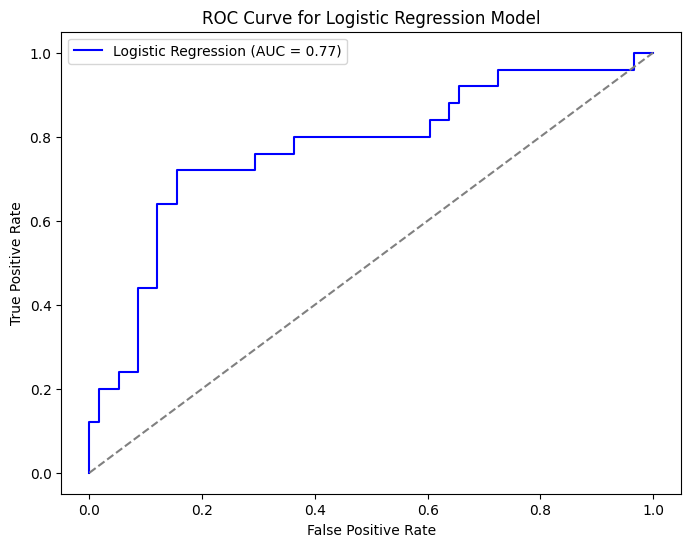

In [16]:
import matplotlib.pyplot as plt # Import pyplot
from sklearn.metrics import roc_curve # Import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 参考线
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 读取基因表达数据集
df = pd.read_csv("gse36059.csv")  # 请修改为你的数据文件路径

# 确保目标变量 (1=排斥, 0=非排斥)
df["Label"] = df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

# 选择特征列（仅使用指定的 3 个基因）
selected_genes = ["GPR171", "FAXDC2", "229668_at"]
X_selected = df[selected_genes]  # 仅保留选定基因
y = df["Label"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# 训练逻辑回归模型
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# 进行预测
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# 计算模型评估指标
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# 输出结果
print(f"Accuracy of logistic regression model: {accuracy:.4f}")
print(f"Logistic regression model AUC: {auc:.4f}")

Accuracy of logistic regression model: 0.6506
Logistic regression model AUC: 0.6938


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 读取基因表达数据集
df = pd.read_csv("gse36059.csv")  # 请修改为你的数据文件路径

# 确保目标变量 (1=排斥, 0=非排斥)
df["Label"] = df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

# 选择特征列（仅使用指定的 3 个基因）
selected_genes = ["WDR3", "LOC100507073", "SCMH1"]
X_selected = df[selected_genes]  # 仅保留选定基因
y = df["Label"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# 训练逻辑回归模型
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# 进行预测
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# 计算模型评估指标
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# 输出结果
print(f"Accuracy of logistic regression model: {accuracy:.4f}")
print(f"Logistic regression model AUC: {auc:.4f}")

Accuracy of logistic regression model: 0.6988
Logistic regression model AUC: 0.6131


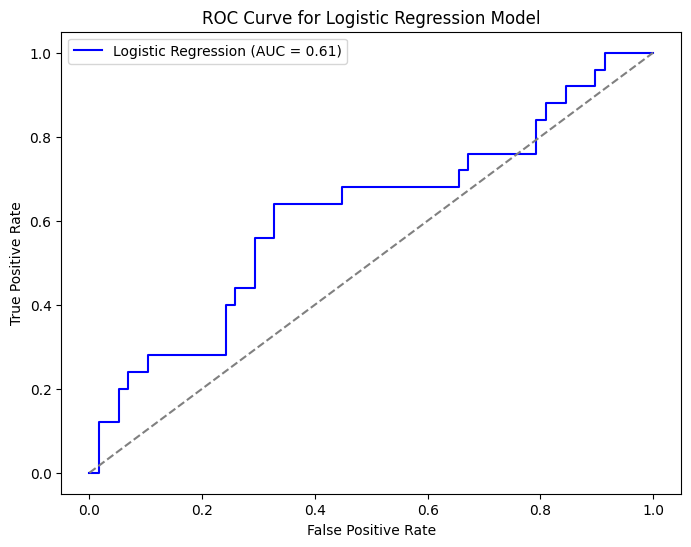

In [2]:
import matplotlib.pyplot as plt # Import pyplot
from sklearn.metrics import roc_curve # Import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 参考线
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()